# TASCA M8 T01
Pendent: Fer una tramesa Pendent: Rebre una qualificació
Descripció
Exercicis d'algoritmes d'Agrupació.

## PREPARACIÓ DEL DATASET I ANÀLISIS BÀSIC INICIAL




In [1]:
# Cridem llibreries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings


In [2]:
# Importo el fitxer
dataset = pd.read_csv(r'C:\Users\Anna\DataScience\SPRINTS\SPRINT 8 Algoritmes aprenentatge no supervisat\Publicacions Facebook Thailandia.csv', encoding = "ISO-8859-1",delimiter=',')

display(dataset)

,ï»¿status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


In [3]:
dataset.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,0.0,0.0,0.0,0.0
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191,NaN,NaN,NaN,NaN
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812,NaN,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000,NaN,NaN,NaN,NaN


In [4]:
# Elimino les 4 últimes columnes, que no hi ha cap tipus de valor
dataset = dataset.drop(["Column1", "Column2", "Column3", "Column4"], axis=1)

dataset.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


In [5]:
# Divideixo la columna status_published en dos, el dia i l'hora, i li canvio el nom a les columnes noves
publicacio = dataset.status_published.str.split(pat=" ",expand=True)
publicacio.columns = ["date_published", "time_published"]
dataset =pd.concat([dataset,publicacio], axis=1)
display(dataset)


,ï»¿status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,date_published,time_published
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,4/22/2018,6:00
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,4/21/2018,22:45
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,4/21/2018,6:17
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,4/21/2018,2:29
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,4/18/2018,3:22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,9/24/2016,2:58
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,9/23/2016,11:19
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,9/21/2016,23:03
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,9/20/2016,0:43


In [6]:
dataset.columns

Index(['ï»¿status_id', 'status_type', 'status_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys', 'date_published',
       'time_published'],
      dtype='object')

In [7]:
# Modifico el nom de la primera columna per fer-lo més accessible
dataset.rename({"ï»¿status_id": "status_id"}, axis=1, inplace=True)

dataset.columns

Index(['status_id', 'status_type', 'status_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys', 'date_published',
       'time_published'],
      dtype='object')

In [8]:
# Reordeno les columnes colocant les que he creat abans a on han d'anar
dataset = dataset.reindex(columns=['status_id', 'status_type', 'status_published','date_published',
       'time_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys'])
dataset.columns

Index(['status_id', 'status_type', 'status_published', 'date_published',
       'time_published', 'num_reactions', 'num_comments', 'num_shares',
       'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads',
       'num_angrys'],
      dtype='object')

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   object
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   date_published    7050 non-null   object
 4   time_published    7050 non-null   object
 5   num_reactions     7050 non-null   int64 
 6   num_comments      7050 non-null   int64 
 7   num_shares        7050 non-null   int64 
 8   num_likes         7050 non-null   int64 
 9   num_loves         7050 non-null   int64 
 10  num_wows          7050 non-null   int64 
 11  num_hahas         7050 non-null   int64 
 12  num_sads          7050 non-null   int64 
 13  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(5)
memory usage: 771.2+ KB


Com a resume, tenim 14 columnes, 5 de categòriques de tipus object i 9 de numèriques de tipus int64.
No tenim cap null al dataset, per tant les 7050 files són vàlides a per a treballar-les sense haver d'eliminar o convertir cap valor.
Els noms de les columnes són fàcils per a entendre què són i per a treballar-los, per tant, el més bàsic de les dades ja ho tenim fet i les podem començar a treballar d'altres maneres.

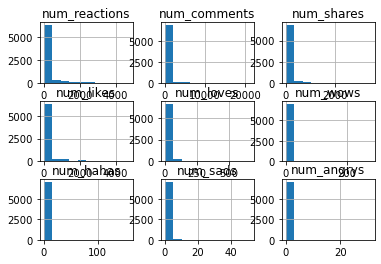

In [10]:
# Fem un histograma dels valors numèrics per veure com es distribueixen d'una forma més visual
dataset.hist()
plt.rcParams['figure.figsize'] = [20, 20]
plt.show()

In [11]:
display(dataset)

,status_id,status_type,status_published,date_published,time_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,4/22/2018,6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,4/21/2018,22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,4/21/2018,6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,4/21/2018,2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,4/18/2018,3:22,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,9/24/2016,2:58,89,0,0,89,0,0,0,0,0
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,9/23/2016,11:19,16,0,0,14,1,0,1,0,0
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,9/21/2016,23:03,2,0,0,1,1,0,0,0,0
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,9/20/2016,0:43,351,12,22,349,2,0,0,0,0


Estandaritzo les dades amb standard scaler per reduir tots els valors en mitjana=0 i variança=1. És un procés bàsic per fer un PCA (Principal Component Analysis), sistema que permet fer anar més ràpid un algoritme de machine learning com per fer visualització de dades

In [12]:
# Importo la llibreria, separo les columnes en x i y i aplico l'standard scale
from sklearn.preprocessing import StandardScaler

X_features = ['num_reactions', 'num_comments', 'num_shares',
       'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads',
       'num_angrys']

X = dataset[X_features]
y = dataset["status_type"]

X = StandardScaler().fit_transform(X)


In [13]:
# Aplico el PCA i passo de 8 components a 2
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
componentsPrincipals = pca.fit_transform(X)
datasetPrincipal = pd.DataFrame(data = componentsPrincipals, columns = ["Component Principal 1","Component Principal 2"])

# Concateno les dues columnes noves amb la columna que he escollit com a target
datasetFinal = pd.concat([dataset["status_type"], datasetPrincipal], axis=1)
display(datasetFinal)

,status_type,Component Principal 1,Component Principal 2
0,video,2.255817,-0.122109
1,photo,-0.632921,0.047366
2,video,0.100804,-0.057427
3,photo,-0.682104,-0.061251
4,photo,-0.453211,0.170515
...,...,...,...
7045,photo,-0.709849,-0.122522
7046,photo,-0.710462,-0.371228
7047,photo,-0.808425,-0.370634
7048,photo,-0.277459,0.556486


In [14]:
datasetFinal.status_type.unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

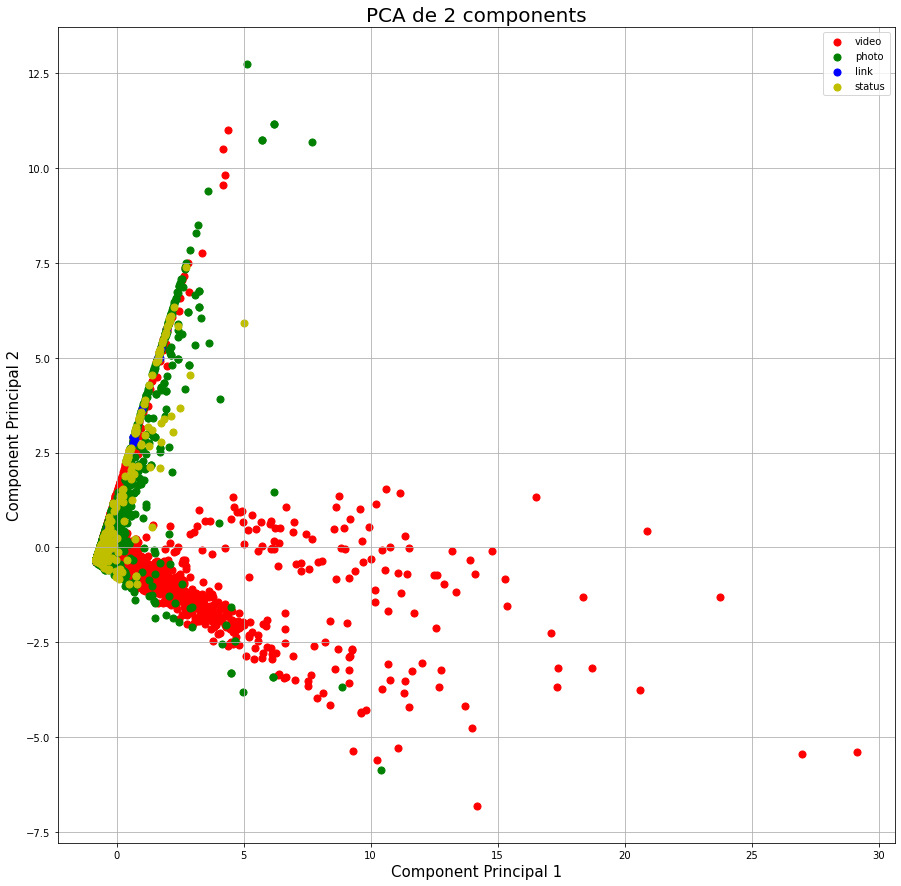

In [15]:
# Faig la figura del PCA de 2 components (visualització de dades)

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(1,1,1) 

ax.set_xlabel("Component Principal 1", fontsize = 15)
ax.set_ylabel("Component Principal 2", fontsize = 15)
ax.set_title('PCA de 2 components', fontsize = 20)


posicions = ["video", "photo", "link", "status"]
colors = ["r", "g", "b", "y"]

for posicio, color in zip(posicions,colors):
    mantenir = datasetFinal["status_type"] == posicio
    ax.scatter(datasetFinal.loc[mantenir, "Component Principal 1"],
              datasetFinal.loc[mantenir, "Component Principal 2"],
              c = color,
              s = 50)

ax.legend(posicions)
ax.grid()

Preparem les dades per aplicar el PCA per fer més ràpids algoritmes de Machine Lerning

In [16]:
X_features = ['num_reactions', 'num_comments', 'num_shares',
       'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads',
       'num_angrys']

X = dataset[X_features]
y_features = ['status_type'] #'status_id', 'status_type', 'date_published', 'time_published'
# decideixo utilitzar status_type però em guardo les altres categòriques per si ho vull canviar en algun moment
y = dataset[y_features]


In [17]:
# Primer de tot dividim el dataset en train i test

from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.30, random_state=0)

In [18]:
print(train_X.shape)

(4935, 9)


In [19]:
print(train_y.shape)

(4935, 1)


In [20]:
print(test_X.shape)

(2115, 9)


In [21]:
print(test_y.shape)

(2115, 1)


In [22]:
# Estandaritzem el dataset amb Standard Scaler, l'adaptem al train_X i l'apliquem al train_X i test_X
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(train_X)
train_X = scaler.transform(train_X)
test_X = scaler.transform(test_X)

Utilitzem el PCA per a fer més ràpids algoritmes de Machine Learning, els quals s'apliquen després del procés que farem ara (és a dir, al primer exercici, l'Exercici 1)

In [23]:
# Importem la llibreria, fem una instància del model i ho apliquem NOMÉS al training set
from sklearn.decomposition import PCA

pca = PCA(.95)

pca.fit(train_X)

PCA(n_components=0.95)

In [24]:
pca.n_components_

7

In [25]:
# Apliquem el mapeig/transformació al conjunt de train_X i al de test_X
train_X = pca.transform(train_X)
test_X = pca.transform(test_X)

In [26]:
# Importo el model que vull utilitzar (amb Sklearn tots els models de machine learning s'implementen com a classes de Python). Aplicarem la regressió logística
from sklearn.linear_model import LogisticRegression

regLog = LogisticRegression(solver="lbfgs") #canviem el paràmetre solver perquè és molt lent
regLog.fit(train_X, train_y)

C:\Users\Anna\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
# Fem una predicció de dades noves utilitzant la informació que ens ha donat el model anteior amb el training
# Predicció per una sola observació
regLog.predict(test_X[0].reshape(1,-1))

array(['photo'], dtype=object)

In [28]:
# Predicció de més d'una observació al mateix moment
regLog.predict(test_X[0:100])

array(['photo', 'video', 'photo', 'photo', 'photo', 'photo', 'photo',
       'photo', 'photo', 'photo', 'photo', 'photo', 'photo', 'photo',
       'video', 'photo', 'video', 'photo', 'photo', 'photo', 'photo',
       'photo', 'photo', 'photo', 'photo', 'photo', 'photo', 'photo',
       'video', 'photo', 'photo', 'photo', 'photo', 'photo', 'photo',
       'photo', 'photo', 'photo', 'photo', 'photo', 'photo', 'photo',
       'video', 'video', 'photo', 'photo', 'video', 'video', 'photo',
       'photo', 'photo', 'photo', 'photo', 'photo', 'photo', 'video',
       'video', 'photo', 'photo', 'photo', 'photo', 'photo', 'photo',
       'photo', 'photo', 'photo', 'photo', 'photo', 'video', 'photo',
       'photo', 'photo', 'photo', 'photo', 'photo', 'photo', 'photo',
       'photo', 'photo', 'photo', 'photo', 'photo', 'video', 'photo',
       'video', 'photo', 'photo', 'video', 'video', 'photo', 'video',
       'photo', 'video', 'video', 'photo', 'photo', 'video', 'photo',
       'photo', 'pho

In [29]:
# Mesurem la precisió del rendiment del model (accuracy, o fracció de prediccions correctes) = prediccions correctes/nombre total de punts de dades
precisio = regLog.score(test_X, test_y)
print(precisio)

0.7612293144208038


Entenem doncs, que la precisió és el percentatge del resultat anterior

## EXERCICI 1
Descarrega el dataset adjunt, de registres de publicacions a Facebook sobre Tailàndia, i classifica els diferents registres utilitzant l'algorisme de K-means.

 



In [30]:
# Importo llibreries necessàries
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [31]:
display(dataset)

,status_id,status_type,status_published,date_published,time_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,4/22/2018,6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,4/21/2018,22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,4/21/2018,6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,4/21/2018,2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,4/18/2018,3:22,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,9/24/2016,2:58,89,0,0,89,0,0,0,0,0
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,9/23/2016,11:19,16,0,0,14,1,0,1,0,0
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,9/21/2016,23:03,2,0,0,1,1,0,0,0,0
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,9/20/2016,0:43,351,12,22,349,2,0,0,0,0


In [32]:
#Converteixo el dataset a array de numpy
features1 = dataset.to_numpy()

print(features1) 
print(type(features1))

[['246675545449582_1649696485147474' 'video' '4/22/2018 6:00' ... 1 1 0]
 ['246675545449582_1649426988507757' 'photo' '4/21/2018 22:45' ... 0 0 0]
 ['246675545449582_1648730588577397' 'video' '4/21/2018 6:17' ... 1 0 0]
 ...
 ['1050855161656896_1060126464063099' 'photo' '9/21/2016 23:03' ... 0 0 0]
 ['1050855161656896_1058663487542730' 'photo' '9/20/2016 0:43' ... 0 0 0]
 ['1050855161656896_1050858841656528' 'photo' '9/10/2016 10:30' ... 0 0 0]]
<class 'numpy.ndarray'>


In [33]:
# Hem quedo només amb les columnes int de l'array anterior, amb les quals vull treballar
features = np.delete(features1, (0,1,2,3,4), axis=1)
print(features[:])
features.shape

[[529 512 262 ... 1 1 0]
 [150 0 0 ... 0 0 0]
 [227 236 57 ... 1 0 0]
 ...
 [2 0 0 ... 0 0 0]
 [351 12 22 ... 0 0 0]
 [17 0 0 ... 0 0 0]]


(7050, 9)

In [34]:
#Canvio la forma de la matriu ja que sinó em donava error més endavant
features = np.reshape(features,(9,7050), order='F')
print(features)
print(features.shape)

[[529 170 221 ... 0 0 0]
 [150 210 152 ... 0 0 0]
 [227 222 234 ... 0 0 0]
 ...
 [503 332 102 ... 0 0 0]
 [295 135 37 ... 0 0 0]
 [203 150 75 ... 0 0 0]]
(9, 7050)


In [35]:
#Creo una array amb només els noms de cada columna i trec les primeres 5 perquè no són de tipus int utilitzant l'skip_header=5
features_nom_etiqueta = np.genfromtxt (dataset, delimiter=',', usecols=(0,), skip_header=5, dtype=str,)
features_nom_etiqueta[:]

array(['num_reactions', 'num_comments', 'num_shares', 'num_likes',
       'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys'],
      dtype='<U13')

In [36]:
#Converteixo els noms dels atributs en números per a poder utilitzar-los
label_encoder = LabelEncoder()

features_nom_encoder = label_encoder.fit_transform(features_nom_etiqueta)

features_nom_encoder[:]
print(features_nom_encoder)
print(features_nom_encoder.shape)

[5 1 7 3 4 8 2 6 0]
(9,)


In [37]:
# Guardem com a número de clusters el tamany del label_encoder per utilitzar-lo més endavant
n_clusters = len(label_encoder.classes_)
print(n_clusters)


9


In [38]:
# Implementem el MinMaxScaler i el PCA al pipline per reduir la dimensionalitat, fer les dades més treballables a nivell de tamany
preprocessor = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("pca", PCA(n_components=2, random_state=42)),
    ]
)


In [39]:
# Creo un pipeline separat per dur a terme l'agrupament de k-means i invalido els arguments predeterminats init, n_init i max_iter per assegurar que es fan totes les iteracions per a obtenir els millors resultats
clusterer = Pipeline(
    [
        (
            "kmeans",
            KMeans(
                n_clusters=n_clusters,
                init="k-means++",
                n_init=50,
                max_iter=500,
                random_state=42,
            ),
        ),
    ]
)

In [40]:
# Creo una pipline dins una altra pipline, és a dir una pipeline de clúster de k-means d'extrem a extrem passant pels pipelines preprocessor i clusterer

pipe = Pipeline(
    [
        ("preprocessor", preprocessor), 
        ("clusterer", clusterer)
    ]
)

In [41]:
#Cridant .fit() amb dades com a argument realitza tots els passos de canalització de les dades:
pipe.fit(features)

C:\Users\Anna\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                 ('pca',
                                  PCA(n_components=2, random_state=42))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=500, n_clusters=9, n_init=50,
                                         random_state=42))]))])

In [42]:
#Evaluo el rendiment calculant el coeficient silhouette 
preprocessed_data = pipe["preprocessor"].transform(features)

In [43]:
predicted_labels = pipe["clusterer"]["kmeans"].labels_

In [44]:
silhouette_score(preprocessed_data, predicted_labels, metric='euclidean')

ValueError: Number of labels is 9. Valid values are 2 to n_samples - 1 (inclusive)

Un coeficient de silhouette 0 indica que els clústers s'estan superposant significativament, i un coeficient desilhouette 1 indica que els clústers estan ben separats. En el nostre cas, està més a prop de l'1 que del 0

In [45]:
# Anem a fer el gràfic de tot això utilitzant DataFrame i seaborn
grafic = pd.DataFrame(
    pipe["preprocessor"].transform(features),
    columns=["component_1", "component_2"],
)

grafic["predicted_cluster"] = pipe["clusterer"]["kmeans"].labels_
grafic["nomAtributs"] = label_encoder.inverse_transform(features_nom_encoder)


C:\Users\Anna\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


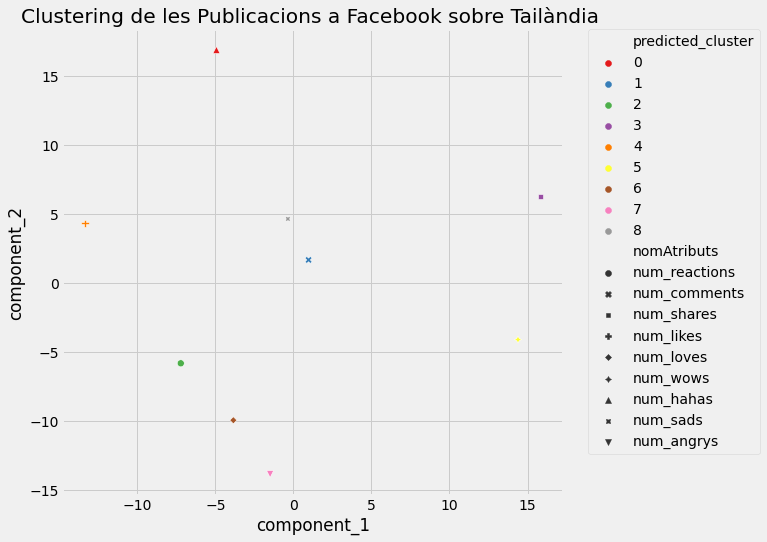

In [46]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 8))

scat = sns.scatterplot(
    "component_1",
    "component_2",
    s=50,
    data=grafic,
    hue="predicted_cluster",
    style="nomAtributs",
    palette="Set1",
)

scat.set_title("Clustering de les Publicacions a Facebook sobre Tailàndia ")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

plt.show()

In [47]:
# Empty lists to hold evaluation metrics
silhouette_scores = []
ari_scores = []
for n in range(2, 11):
    # This set the number of components for pca,
    # but leaves other steps unchanged
    pipe["preprocessor"]["pca"].n_components = n
    pipe.fit(features)

    silhouette_coef = silhouette_score(
        pipe["preprocessor"].transform(features),
        pipe["clusterer"]["kmeans"].labels_,
    )
    ari = adjusted_rand_score(
        features_nom_encoder,
        pipe["clusterer"]["kmeans"].labels_,
    )

    # Add metrics to their lists
    silhouette_scores.append(silhouette_coef)
    ari_scores.append(ari)

C:\Users\Anna\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


ValueError: Number of labels is 9. Valid values are 2 to n_samples - 1 (inclusive)

## EXERCICI  2
Classifica els diferents registres utilitzant l'algorisme de clustering jeràrquic.





In [48]:
# Observem les dades que volem utilitzar per recordar el format
dataset.head()

,status_id,status_type,status_published,date_published,time_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,4/22/2018,6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,4/21/2018,22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,4/21/2018,6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,4/21/2018,2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,4/18/2018,3:22,213,0,0,204,9,0,0,0,0


In [49]:
dataset.columns

Index(['status_id', 'status_type', 'status_published', 'date_published',
       'time_published', 'num_reactions', 'num_comments', 'num_shares',
       'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads',
       'num_angrys'],
      dtype='object')

In [50]:
#Elimino les columnes que són de tipus objecte i em quedo només amb les de tipus int
dataset = dataset.drop(['status_id', 'status_type', 'status_published', 'date_published',
       'time_published'],axis=1)
dataset.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,529,512,262,432,92,3,1,1,0
1,150,0,0,150,0,0,0,0,0
2,227,236,57,204,21,1,1,0,0
3,111,0,0,111,0,0,0,0,0
4,213,0,0,204,9,0,0,0,0


In [51]:
#Normalitzem els valors del dataset
from sklearn.preprocessing import normalize
data_scaled = normalize(dataset)
data_scaled = pd.DataFrame(data_scaled, columns=dataset.columns)
data_scaled.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,0.589334,0.570395,0.291882,0.481271,0.102493,0.003342,0.001114,0.001114,0.0
1,0.707107,0.000000,0.000000,0.707107,0.000000,0.000000,0.000000,0.000000,0.0
2,0.581225,0.604269,0.145946,0.522334,0.053770,0.002560,0.002560,0.000000,0.0
3,0.707107,0.000000,0.000000,0.707107,0.000000,0.000000,0.000000,0.000000,0.0
4,0.721864,0.000000,0.000000,0.691363,0.030501,0.000000,0.000000,0.000000,0.0


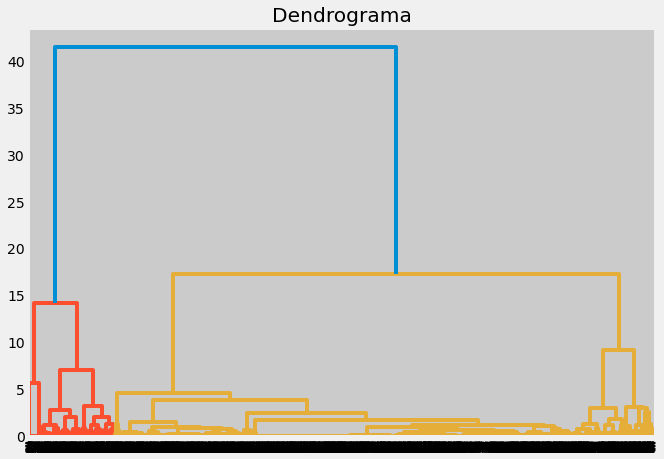

In [52]:
# Dibuixo el dendograma
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograma")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

L'eix X conté les mostres i l'eix Y representa la distància entre aquestes mostres. La línia vertical amb distància màxima és la línia blava i, per tant, podem decidir un llindar i tallar el dendrograma (sobre 25 per exemple)

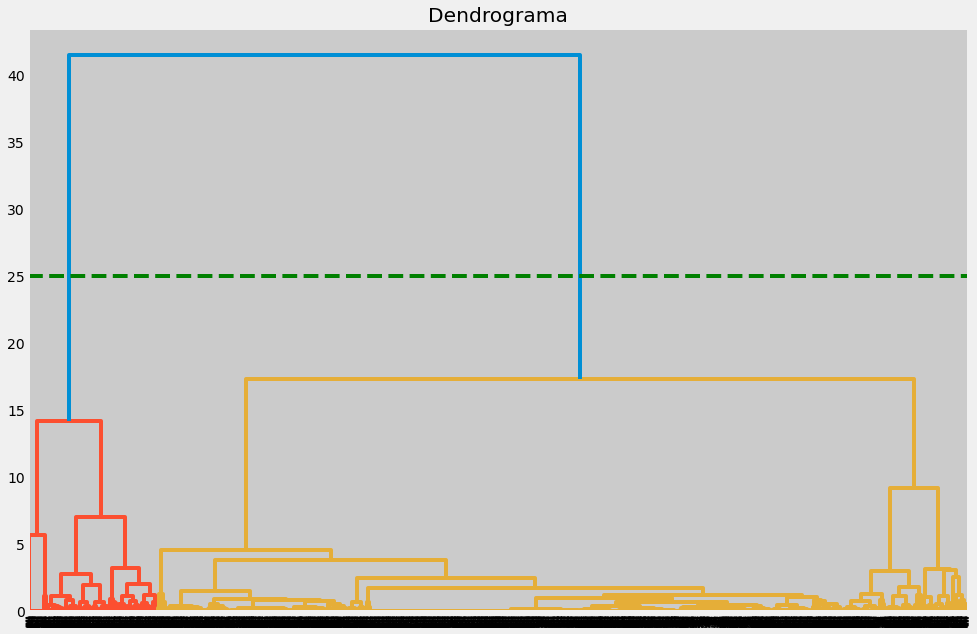

In [53]:
plt.figure(figsize=(15, 10))  
plt.title("Dendrograma")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=25, color='g', linestyle='--')

Tenim dos clústers ja que la línia talla el dendrograma en dos punts. Ara apliquem l'agrupació jeràrquica per a 2 clústers

In [54]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Podem veure els valors de 0 i 1 a la sortida ja que hem definit 2 clústers. 0 representa els punts que pertanyen al primer clúster i 1 representa els punts del segon clúster. Visualitzem ara els dos grups:

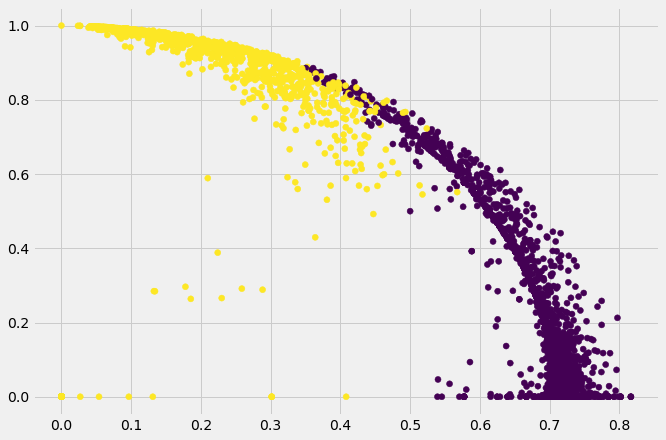

In [60]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled["num_reactions"], data_scaled["num_comments"], c=cluster.labels_) 

## EXERCICI  3
Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.
